#### Aim: To avoid rejects

#### Approach: To find the features that are affecting the rejections the most. 

In [2]:
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

In [3]:
assignment_data = pd.read_csv(r"G:\Swiggy\Data\Assignment_Data.csv")

delivery_partners_data = pd.read_csv(r"G:\Swiggy\Data\Delivery_Partners_Data.csv")

In [4]:
assignment_data.head()

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
0,2745,180976,2021-02-13 03:08:24.000,2021-02-13 03:38:26.000,0,NaN,2021-02-13 03:01:11.686,2021-02-13 03:43:26.000,320.9,320.0,314.0,1810.0,63,2021-02-13 03:07:34.000,373.0,37.377569,72.832560
1,9462,280243,2021-02-14 05:06:40.000,2021-02-14 05:31:04.000,0,NaN,2021-02-14 04:54:25.832,2021-02-14 05:36:04.000,516.8,342.5,451.0,3210.0,27,2021-02-14 05:06:40.000,373.0,37.380613,72.796909
2,14071,339813,2021-02-15 02:22:40.000,2021-02-15 02:44:02.000,0,NaN,2021-02-15 02:01:17.864,2021-02-15 02:49:02.000,459.5,418.7,443.0,2910.0,57,2021-02-15 02:22:35.000,373.0,37.372032,72.805871
3,14442,1315348,2021-02-15 03:01:25.000,2021-02-15 03:15:02.000,0,NaN,2021-02-15 02:43:41.129,2021-02-15 03:20:02.000,376.4,332.9,367.3,3210.0,41,2021-02-15 03:00:28.000,373.0,37.371380,72.819992
4,14515,1186729,2021-02-15 03:12:24.000,2021-02-15 03:50:24.000,0,NaN,2021-02-15 02:48:17.074,2021-02-15 03:55:24.000,414.5,334.1,413.2,3210.0,13,2021-02-15 03:12:09.000,373.0,37.369925,72.826764


In [5]:
delivery_partners_data.head()

,DE_ID,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_JOINING_DATE,DE_ZONE_ID
0,141533,06:42,37.390427,72.849424,2019-09-20,372
1,235942,08:42,37.372289,72.885341,2020-03-15,372
2,973234,06:42,37.410268,72.853610,2018-12-21,375
3,973473,05:42,37.397067,72.872533,2018-12-21,624
4,1016546,06:42,37.425545,72.895137,2019-01-11,668


In [6]:
assignment_data.reject_ind.value_counts()

0    124346
1      8048
Name: reject_ind, dtype: int64

In [48]:
## joining both the dataframes to get the final data

data = assignment_data.merge(delivery_partners_data, on = "DE_ID", how = "left")

data.head()

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,...,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_JOINING_DATE,DE_ZONE_ID
0,2745,180976,2021-02-13 03:08:24.000,2021-02-13 03:38:26.000,0,NaN,2021-02-13 03:01:11.686,2021-02-13 03:43:26.000,320.9,320.0,...,63,2021-02-13 03:07:34.000,373.0,37.377569,72.832560,05:42,37.374634,72.871986,2019-10-25,373
1,9462,280243,2021-02-14 05:06:40.000,2021-02-14 05:31:04.000,0,NaN,2021-02-14 04:54:25.832,2021-02-14 05:36:04.000,516.8,342.5,...,27,2021-02-14 05:06:40.000,373.0,37.380613,72.796909,06:42,37.377694,72.850738,2020-05-19,372
2,14071,339813,2021-02-15 02:22:40.000,2021-02-15 02:44:02.000,0,NaN,2021-02-15 02:01:17.864,2021-02-15 02:49:02.000,459.5,418.7,...,57,2021-02-15 02:22:35.000,373.0,37.372032,72.805871,05:42,37.395456,72.872473,2020-07-25,372
3,14442,1315348,2021-02-15 03:01:25.000,2021-02-15 03:15:02.000,0,NaN,2021-02-15 02:43:41.129,2021-02-15 03:20:02.000,376.4,332.9,...,41,2021-02-15 03:00:28.000,373.0,37.371380,72.819992,06:42,37.422797,72.824708,2019-06-02,372
4,14515,1186729,2021-02-15 03:12:24.000,2021-02-15 03:50:24.000,0,NaN,2021-02-15 02:48:17.074,2021-02-15 03:55:24.000,414.5,334.1,...,13,2021-02-15 03:12:09.000,373.0,37.369925,72.826764,05:42,37.386463,72.854589,2019-04-05,372


In [49]:
## checking the shape of original and final datasets

assignment_data.shape, delivery_partners_data.shape, data.shape

((132394, 17), (991, 6), (132394, 22))

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132394 entries, 0 to 132393
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ORDER_ID                  132394 non-null  int64  
 1   DE_ID                     132394 non-null  int64  
 2   ASSIGNMENT_START_TIME     132394 non-null  object 
 3   ASSIGNMENT_END_TIME       132394 non-null  object 
 4   reject_ind                132394 non-null  int64  
 5   reject_type               8048 non-null    object 
 6   PLACED_TIME               132394 non-null  object 
 7   DELIVERED_TIME            131782 non-null  object 
 8   LASTMILE_DISTANCE         132384 non-null  float64
 9   FIRSTMILE_DISTANCE        132238 non-null  float64
 10  LAST_MILE_TIME_PREDICTED  132394 non-null  float64
 11  PAYOUT_MADE_TO_DE         132391 non-null  float64
 12  NUM_PING_COUNT_LAST10MIN  132394 non-null  int64  
 13  LAST_PING_TIME_LAST10MIN  132394 non-null  o

In [23]:
data.describe()

,ORDER_ID,DE_ID,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,DE_HOME_LAT,DE_HOME_LNG,DE_ZONE_ID,ASSIGNMENT_TIME,DELIVERY_TIME
count,132394.000000,1.323940e+05,132394.000000,132384.000000,132238.000000,132394.000000,132391.000000,132394.000000,113853.000000,132394.000000,132394.000000,132394.000000,132394.000000,132394.000000,132394.000000,131782.000000
mean,62266.261303,6.156389e+05,0.060788,432.864177,364.857121,403.579538,2764.807124,24.165408,489.926537,37.389104,72.859044,37.375983,72.882069,484.022040,27.978552,41.169406
std,36083.677703,3.801389e+05,0.238942,82.305359,40.211260,53.905507,1277.496520,17.674050,171.226181,0.023136,0.032406,0.258701,0.491812,173.045174,13.005148,13.842664
min,1.000000,2.200000e+02,0.000000,320.000000,320.000000,250.000000,0.000000,1.000000,372.000000,37.271775,72.703223,25.268688,70.910224,372.000000,0.100000,7.390000
25%,30948.250000,3.338200e+05,0.000000,373.400000,327.500000,361.500000,2110.000000,11.000000,373.000000,37.371754,72.837974,37.368926,72.841093,372.000000,19.720000,31.580000
50%,62166.500000,3.862560e+05,0.000000,415.400000,356.600000,399.500000,2610.000000,20.000000,375.000000,37.387886,72.856902,37.384657,72.859931,374.000000,26.720000,39.240000
75%,93589.750000,9.462630e+05,0.000000,473.900000,392.600000,440.800000,3260.000000,32.000000,624.000000,37.407065,72.878175,37.405834,72.880463,624.000000,35.000000,48.420000
max,124798.000000,1.376302e+06,1.000000,1044.500000,743.000000,642.300000,10410.000000,120.000000,841.000000,37.483737,73.029503,38.031204,84.199659,1192.000000,558.420000,563.640000


## Null values

In [52]:
data.isna().sum()

ORDER_ID                         0
DE_ID                            0
ASSIGNMENT_START_TIME            0
ASSIGNMENT_END_TIME              0
reject_ind                       0
reject_type                 124346
PLACED_TIME                      0
DELIVERED_TIME                 612
LASTMILE_DISTANCE               10
FIRSTMILE_DISTANCE             156
LAST_MILE_TIME_PREDICTED         0
PAYOUT_MADE_TO_DE                3
NUM_PING_COUNT_LAST10MIN         0
LAST_PING_TIME_LAST10MIN         0
CUSTOMER_ZONE                18541
CUSTOMER_LAT                     0
CUSTOMER_LNG                     0
SHIFT_END_TIME                   0
DE_HOME_LAT                      0
DE_HOME_LNG                      0
DE_JOINING_DATE                  0
DE_ZONE_ID                       0
ASSIGNMENT_TIME                  0
DELIVERY_TIME                  612
dtype: int64

In [53]:
print(data[assignment_data.reject_ind == 1][['reject_ind', 'reject_type']].head()) 
data[assignment_data.reject_ind == 1][['reject_ind', 'reject_type']].shape

    reject_ind reject_type
12           1      Type-2
38           1      Type-2
44           1      Type-1
47           1      Type-4
56           1      Type-2


(8048, 2)

In [54]:
#### variable encoding for "reject_type"

def reject_type(x):
    if x == "Type-1":
        return 1
    elif x == "Type-2":
        return 2
    elif x == "Type-3":
        return 3
    elif x == "Type-4":
        return 4
    else:
        return 0
    
data["reject_type"] = data["reject_type"].apply(reject_type)

In [55]:
data["reject_type"].value_counts()

0    124346
1      3853
2      2007
3      1449
4       739
Name: reject_type, dtype: int64

In [80]:
data["DELIVERY_TIME"].fillna((data["DELIVERY_TIME"].mean()), inplace = True)
data["PAYOUT_MADE_TO_DE"].fillna((data["PAYOUT_MADE_TO_DE"].mean()), inplace = True)
data["FIRSTMILE_DISTANCE"].fillna((data["FIRSTMILE_DISTANCE"].mean()), inplace = True)
data["LASTMILE_DISTANCE"].fillna((data["LASTMILE_DISTANCE"].mean()), inplace = True)

data["CUSTOMER_ZONE"].fillna((data["CUSTOMER_ZONE"].mean()), inplace = True)

## Feature Engineering 

In [51]:
data['ASSIGNMENT_TIME'] = round(((pd.to_datetime(data['ASSIGNMENT_END_TIME']) - 
                            pd.to_datetime(data['ASSIGNMENT_START_TIME']))
                                .dt.total_seconds() / 60),2)

data['DELIVERY_TIME'] = round(((pd.to_datetime(data['DELIVERED_TIME']) - 
                            pd.to_datetime(data['PLACED_TIME']))
                                .dt.total_seconds() / 60), 2)

data[['ASSIGNMENT_TIME', 'DELIVERY_TIME']].head()

,ASSIGNMENT_TIME,DELIVERY_TIME
0,30.03,42.24
1,24.40,41.64
2,21.37,47.74
3,13.62,36.35
4,38.00,67.12


Type-1    3853
Type-2    2007
Type-3    1449
Type-4     739
Name: reject_type, dtype: int64


(<AxesSubplot:>, None)

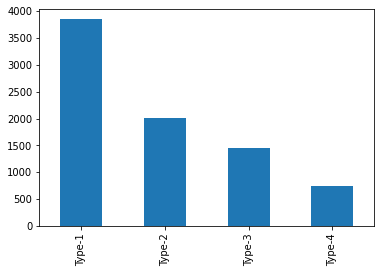

In [40]:
temp = data["reject_type"].value_counts()

temp.plot(kind = "bar"), print(temp)

## EDA

In [81]:
data.columns

Index(['ORDER_ID', 'DE_ID', 'ASSIGNMENT_START_TIME', 'ASSIGNMENT_END_TIME',
       'reject_ind', 'reject_type', 'PLACED_TIME', 'DELIVERED_TIME',
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 'LAST_MILE_TIME_PREDICTED',
       'PAYOUT_MADE_TO_DE', 'NUM_PING_COUNT_LAST10MIN',
       'LAST_PING_TIME_LAST10MIN', 'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'SHIFT_END_TIME', 'DE_HOME_LAT', 'DE_HOME_LNG',
       'DE_JOINING_DATE', 'DE_ZONE_ID', 'ASSIGNMENT_TIME', 'DELIVERY_TIME'],
      dtype='object')

In [82]:
coor_mat_data = data[['ORDER_ID', 'DE_ID',
       'reject_ind',
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 'LAST_MILE_TIME_PREDICTED',
       'PAYOUT_MADE_TO_DE', 'NUM_PING_COUNT_LAST10MIN', 'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'DE_HOME_LAT', 'DE_HOME_LNG', 'DE_ZONE_ID', 'ASSIGNMENT_TIME', 'DELIVERY_TIME']]

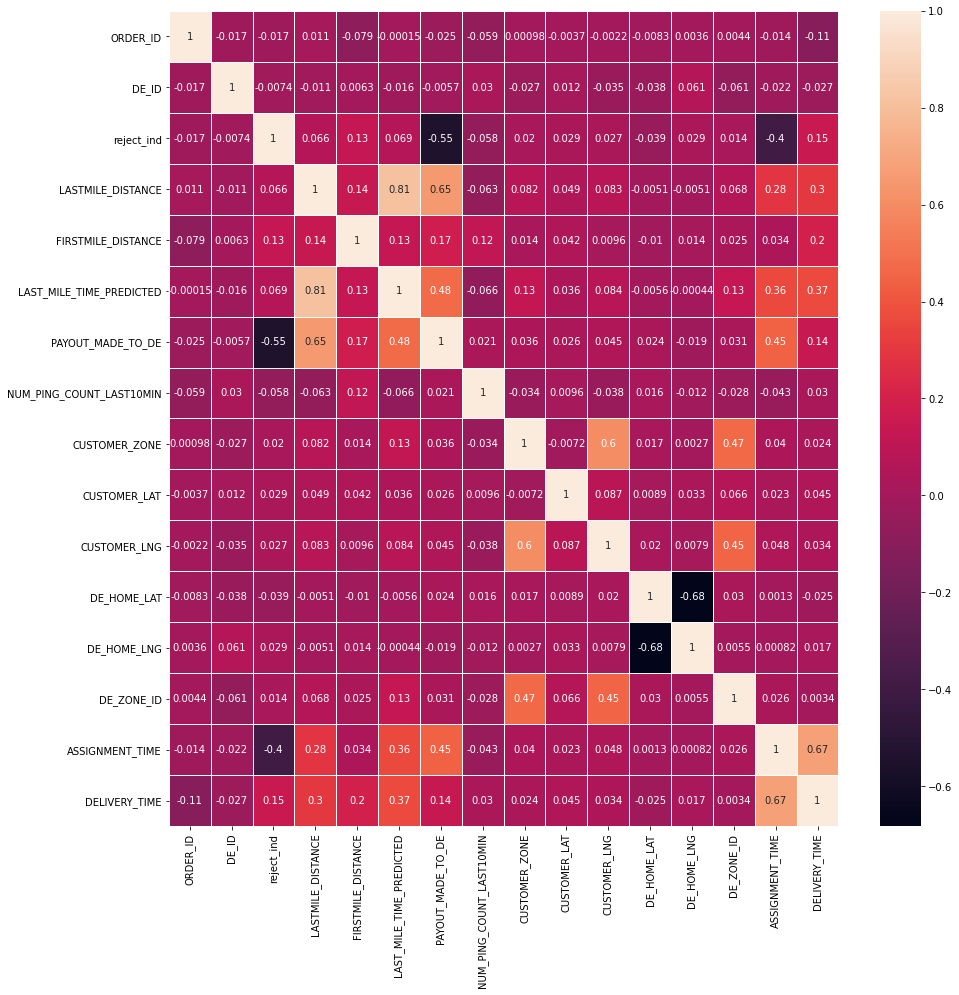

In [83]:
corr_matrix = coor_mat_data.corr()

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

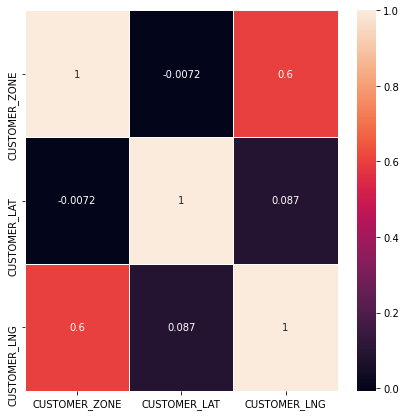

In [84]:
corr_matrix = data[['CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG']].corr()

fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

## Models

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split

In [95]:
y = data["reject_ind"]
X = data[['ORDER_ID', 'DE_ID',
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 'LAST_MILE_TIME_PREDICTED',
       'PAYOUT_MADE_TO_DE', 'NUM_PING_COUNT_LAST10MIN',
       'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'DE_HOME_LAT', 'DE_HOME_LNG',
       'DE_ZONE_ID', 'ASSIGNMENT_TIME', 'DELIVERY_TIME']]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
X_train.shape, X_test.shape

((88703, 15), (43691, 15))

In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# random_grid ={'num_leaves': range(1, 50,10), 
#              'min_child_samples': range(100, 500,50), 
#              'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2],
#              'reg_alpha': [0, 1e-1, 1,  5, 10, 50, 100],
#              'reg_lambda': [0, 1e-1, 1, 5, 10, 50, 100]}

weights=[1, 10, 25, 50]
params = {
        'min_child_weight': [1e-2, 1e-1, 1, 1e2, 5],
        'gamma': [0.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'scale_pos_weight':weights
        }

clf = XGBClassifier()
rf_random = RandomizedSearchCV(clf,params,verbose=1,cv=4,n_jobs = -1,scoring='recall')
rf_random.fit(X_train,y_train)

print(rf_random.best_estimator_)

from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score
print("Classification Report",classification_report(y_pred=rf_random.best_estimator_.predict(X_test),y_true=y_test))
print("confusion matrix",confusion_matrix(y_pred=rf_random.best_estimator_.predict(X_test),y_true=y_test))
print("Recall Score",recall_score(y_pred=rf_random.best_estimator_.predict(X_test),y_true=y_test))
print("F1 Score",f1_score(y_pred=rf_random.best_estimator_.predict(X_test),y_true=y_test))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:02:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=50, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)
Classification Report               precision    recall  f1-score   support

           0       1.00   

In [99]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(X_train, y_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

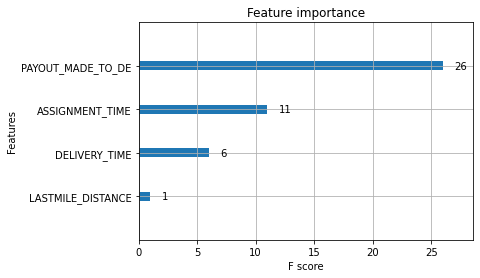

In [100]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

- Here, PAYOUT_MADE_TO_DE, ASSIGNMENT_TIME, DELIVERY_TIME (difference between DELIVERED_TIME & PLACED_TIME) & LASTMILE DISTANCE are the most important features in deciding the output

- The classification model can be used to predict which orders are likely to be rejected by the DE. 
- Hence, the allocation of DE can be improved.